## Business Case :- Concrete Compressive Strength Civil Engineer Project

* Concrete as a building block of most construction is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

* The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from the laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).


#### Domain Name :-  Structural Engineering and Material Science

## Domain Analysis

* Domain analysis is the process of studying and understanding the specific industry or field related to a project. It involves identifying key concepts, factors, challenges, and best practices to build an effective solution. In the case of your Concrete Compressive Strength Civil Engineer Project, domain analysis would focus on understanding how compressive strength is measured and the factors affecting it. Concrete compressive strength refers to its ability to withstand loads before failure, which is crucial in civil engineering for ensuring the durability and safety of structures like buildings, bridges, and roads. Several factors influence this strength, including the type of cement, water-cement ratio, aggregates, admixtures, and curing time, with standard tests conducted at 7, 14, and 28 days. By conducting domain analysis, you can gain insights into data sources, prediction methods, and optimization techniques to improve concrete quality and structural integrity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("concrete.csv")
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Attribute Information:

* Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength determination is the objective of the regression task. The order of this listing corresponds to the order of numerals along the rows of the database.

**Cement:** The amount of cement (in kg/m³) used in the concrete mix. Cement is the primary binding material that contributes significantly to strength development.

**Slag:** The quantity of ground granulated blast-furnace slag (kg/m³) used as a partial replacement for cement. Slag improves durability and long-term strength.

**Ash:** The amount of fly ash (kg/m³), a byproduct of coal combustion, used as a cement substitute. It enhances workability and long-term strength but may reduce early strength.

**Water:** The amount of water (kg/m³) in the mix. The water-cement ratio is crucial because too much water weakens concrete, while too little makes it hard to mix and place.

**Superplasticizer:** A chemical additive (kg/m³) used to improve workability without adding extra water. It helps in achieving higher strength and reduces water demand.

**Coarseagg (Coarse Aggregate):** The quantity (kg/m³) of larger stones or gravel in the mix. Coarse aggregates provide bulk and strength to the concrete.

**Fineagg (Fine Aggregate):** The amount (kg/m³) of fine sand or crushed stone that fills voids between coarse aggregates and improves cohesion.

**Age:** The number of days since the concrete was cast. Concrete gains strength over time, with common testing periods being 7, 14, and 28 days.

**Strength:** The compressive strength (MPa) of the concrete, which is the target variable to predict. It measures the maximum load the concrete can bear before failure.

* The quality of concrete strength depends on the intended application. In general:

* Less than 20 MPa → Low strength, suitable for sidewalks, driveways, and non-structural uses.

* 20–40 MPa → Standard strength, used in houses, buildings, and roads.

* 40–80 MPa → High strength, ideal for bridges, high-rise buildings, and heavy-load structures.

* 80+ MPa → Ultra-high strength, used in skyscrapers, nuclear plants, and specialized projects.

## Basic Check

* A basic check in the context of concrete compressive strength refers to fundamental tests and validations to ensure the concrete meets required strength and quality standards. These checks help identify potential issues before full-scale construction begins.

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## EDA:- Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of analyzing and summarizing a dataset to understand its key characteristics before applying machine learning models. It involves visualizing data, identifying patterns, detecting missing values, and understanding relationships between variables. In the context of your Concrete Compressive Strength Civil Engineer Project, EDA would help explore how different factors like cement content, water ratio, and curing time impact concrete strength. Common EDA techniques include statistical summaries, histograms, scatter plots, correlation matrices, and box plots to detect trends, outliers, or inconsistencies in the data. Conducting EDA ensures that the data is clean, well-structured, and suitable for predictive modeling, ultimately leading to more accurate and reliable results.

#### 1. Univariant Analysis

* Univariate analysis is a type of statistical analysis that examines only one variable at a time to understand its distribution, central tendency, and spread. It helps identify patterns, outliers, and the overall behavior of a single feature in a dataset.

* In your Concrete Compressive Strength Civil Engineer Project, performing univariate analysis on columns like cement, water, or strength can reveal insights about their range, mean, median, and variability

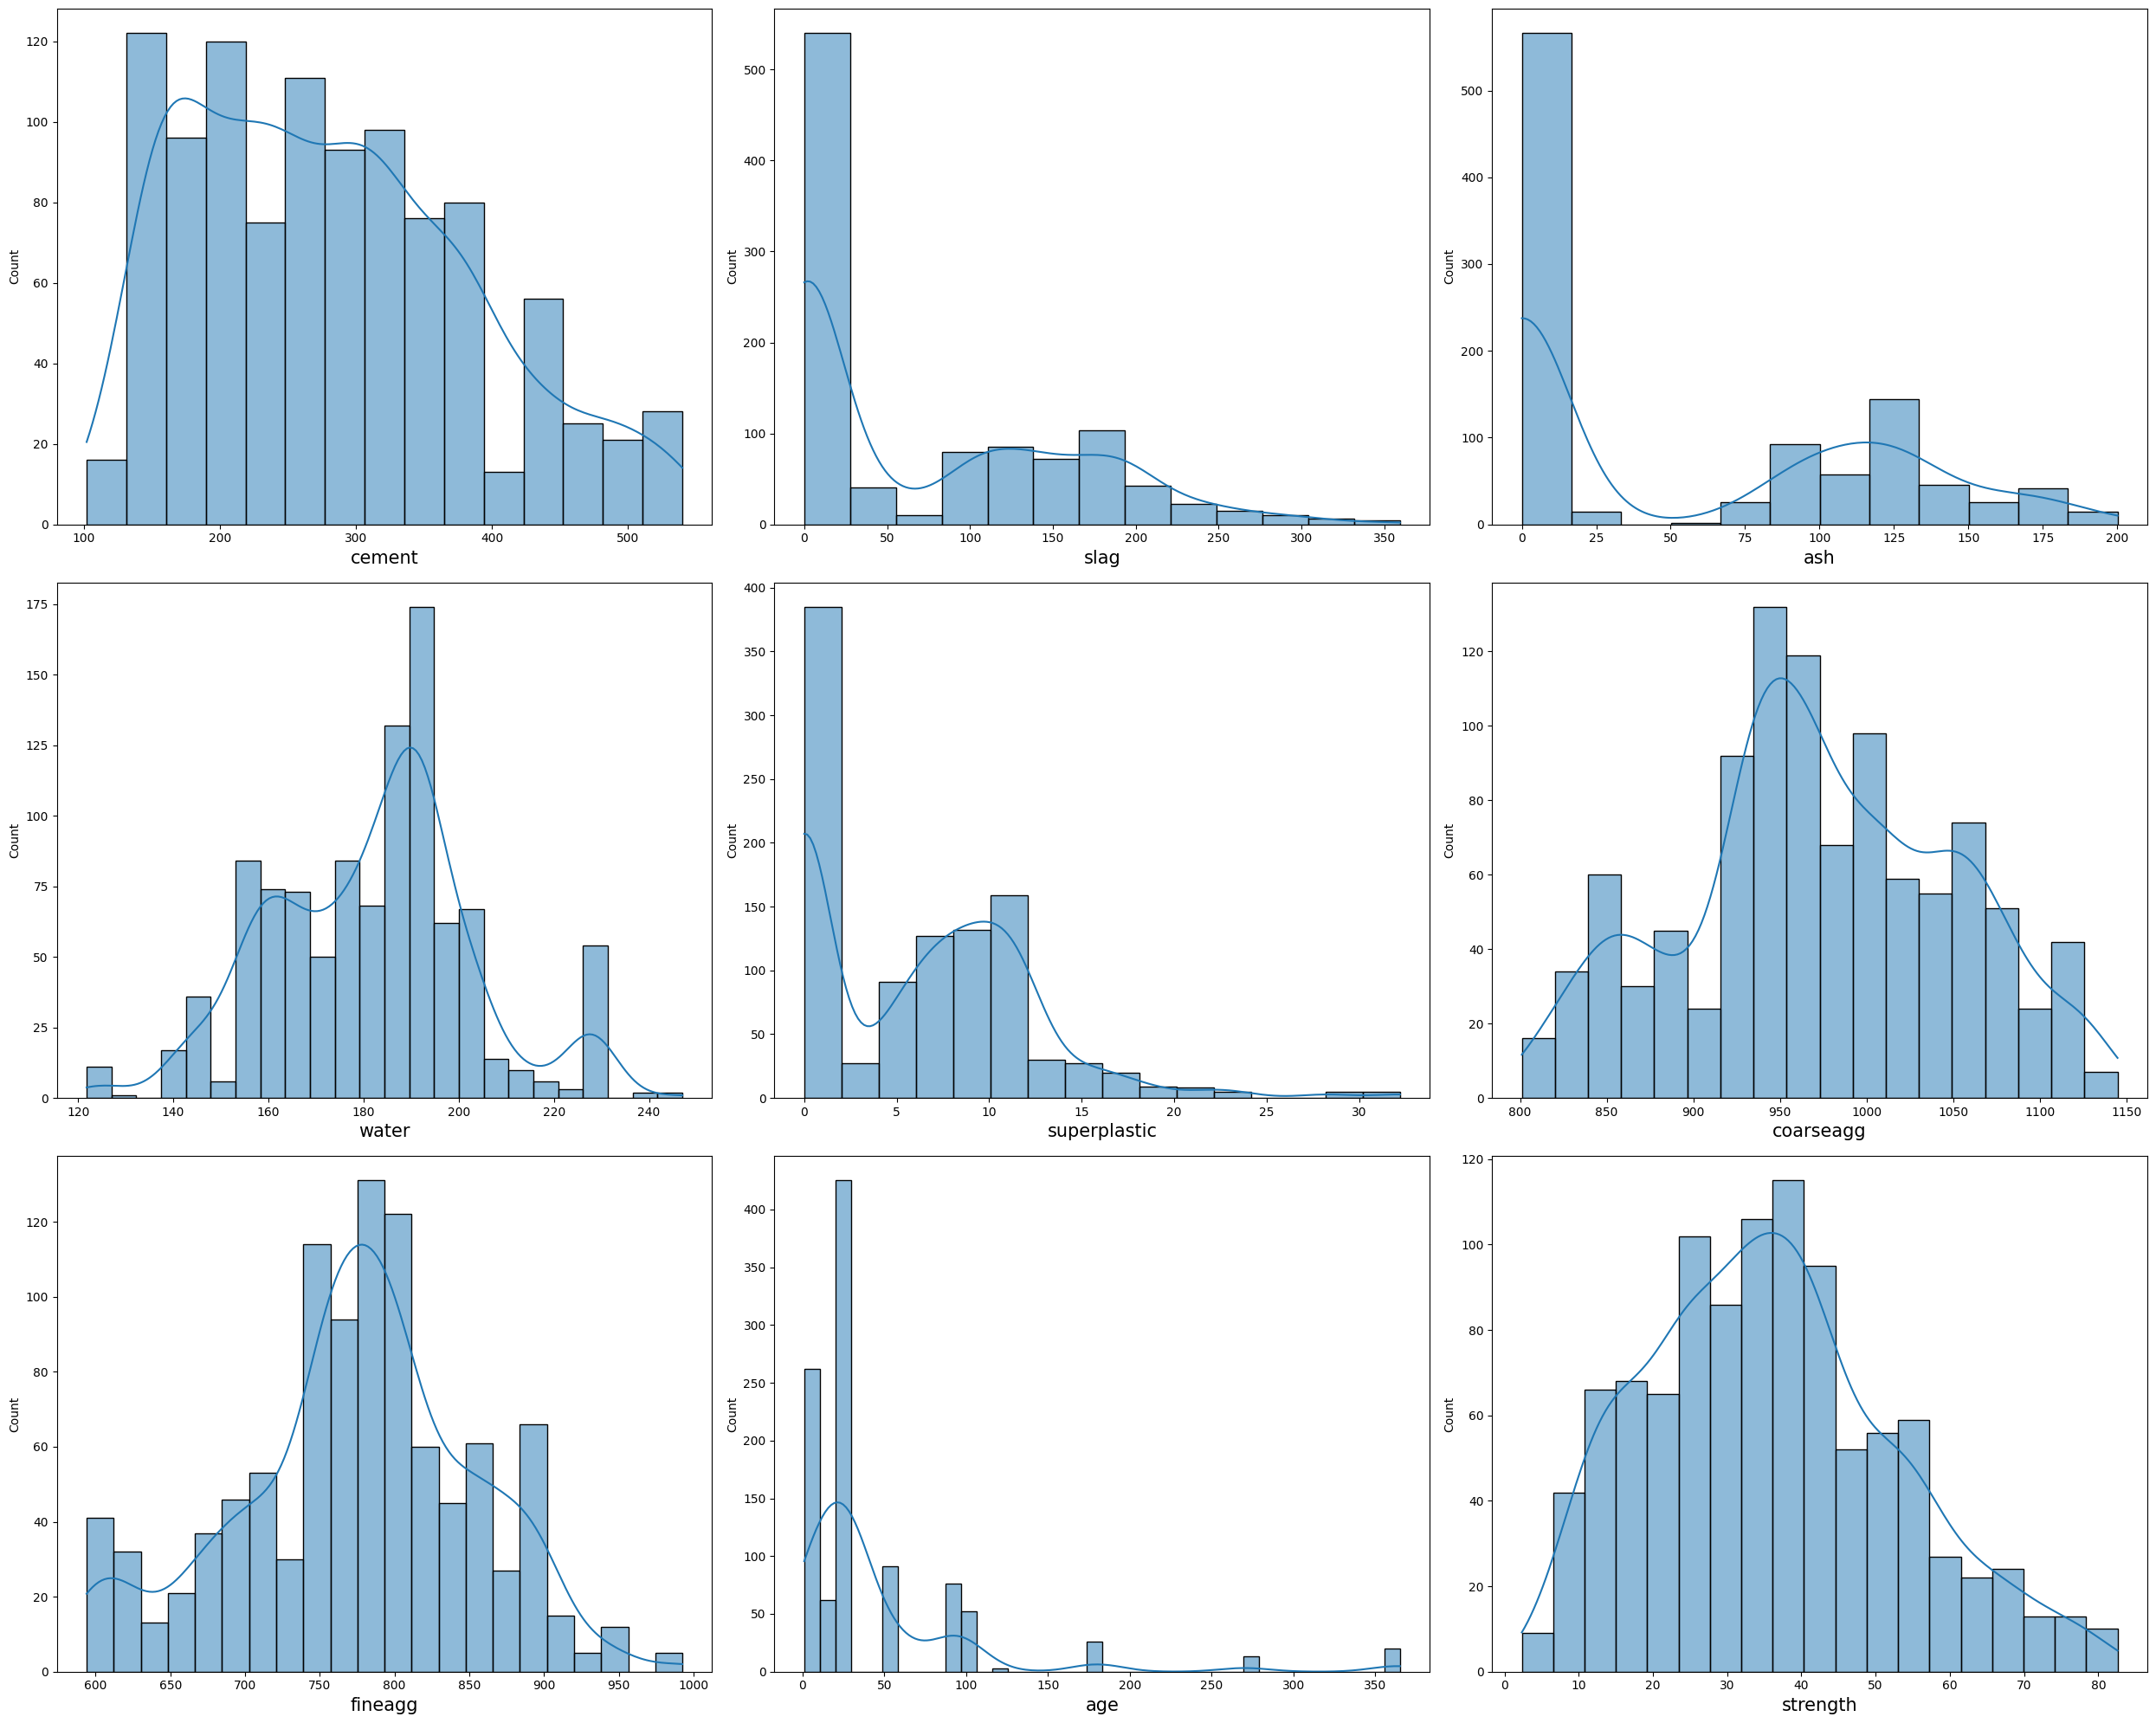

In [7]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here we can seen that not any columns follow nornaml distribution.

#### 2. Biavariant Analysis

* Bivariate analysis is a statistical method used to examine the relationship between two variables in a dataset. It helps identify correlations, dependencies, and patterns between variables, which is essential for understanding how one factor may influence another.

* In your Concrete Compressive Strength Civil Engineer Project, bivariate analysis can be used to study the relationship between cement content and strength or water content and strength to determine how these factors impact compressive strength.

<Axes: xlabel='age', ylabel='strength'>

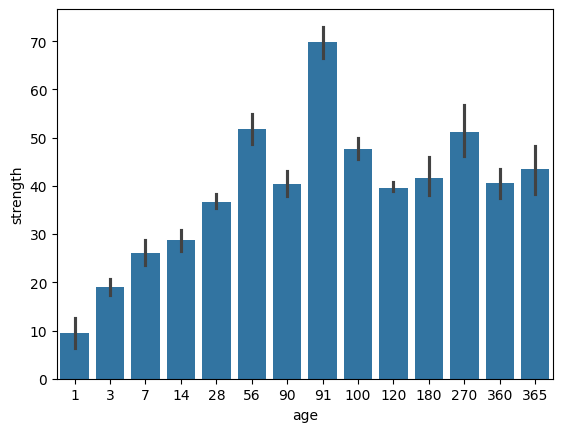

In [8]:
sns.barplot(x = data["age"],y = data["strength"])

**Insights:-**
* Here we can seen that 91 age during strength is very high show 70.

<Axes: xlabel='age', ylabel='strength'>

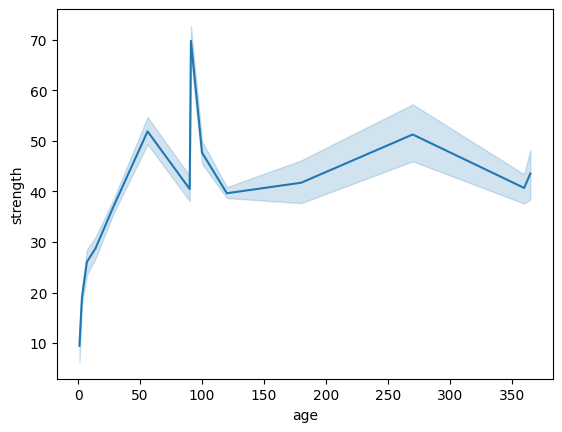

In [9]:
sns.lineplot(x = data["age"],y = data["strength"])

**Insights:-**
* Here we can seen that 100 age during strength is very high show like 60 to 70.

#### 3. Multivariant Analysis

* Multivariate analysis is a statistical technique used to examine the relationships between three or more variables simultaneously. It helps in understanding complex interactions between multiple factors in a dataset, which is crucial for making data-driven decisions and building predictive models.

* In your Concrete Compressive Strength Civil Engineer Project, multivariate analysis can help determine how multiple factors—such as cement, water content, superplasticizer, and age—jointly affect the compressive strength of concrete. Instead of looking at each variable separately, this approach provides a holistic view of their combined influence.

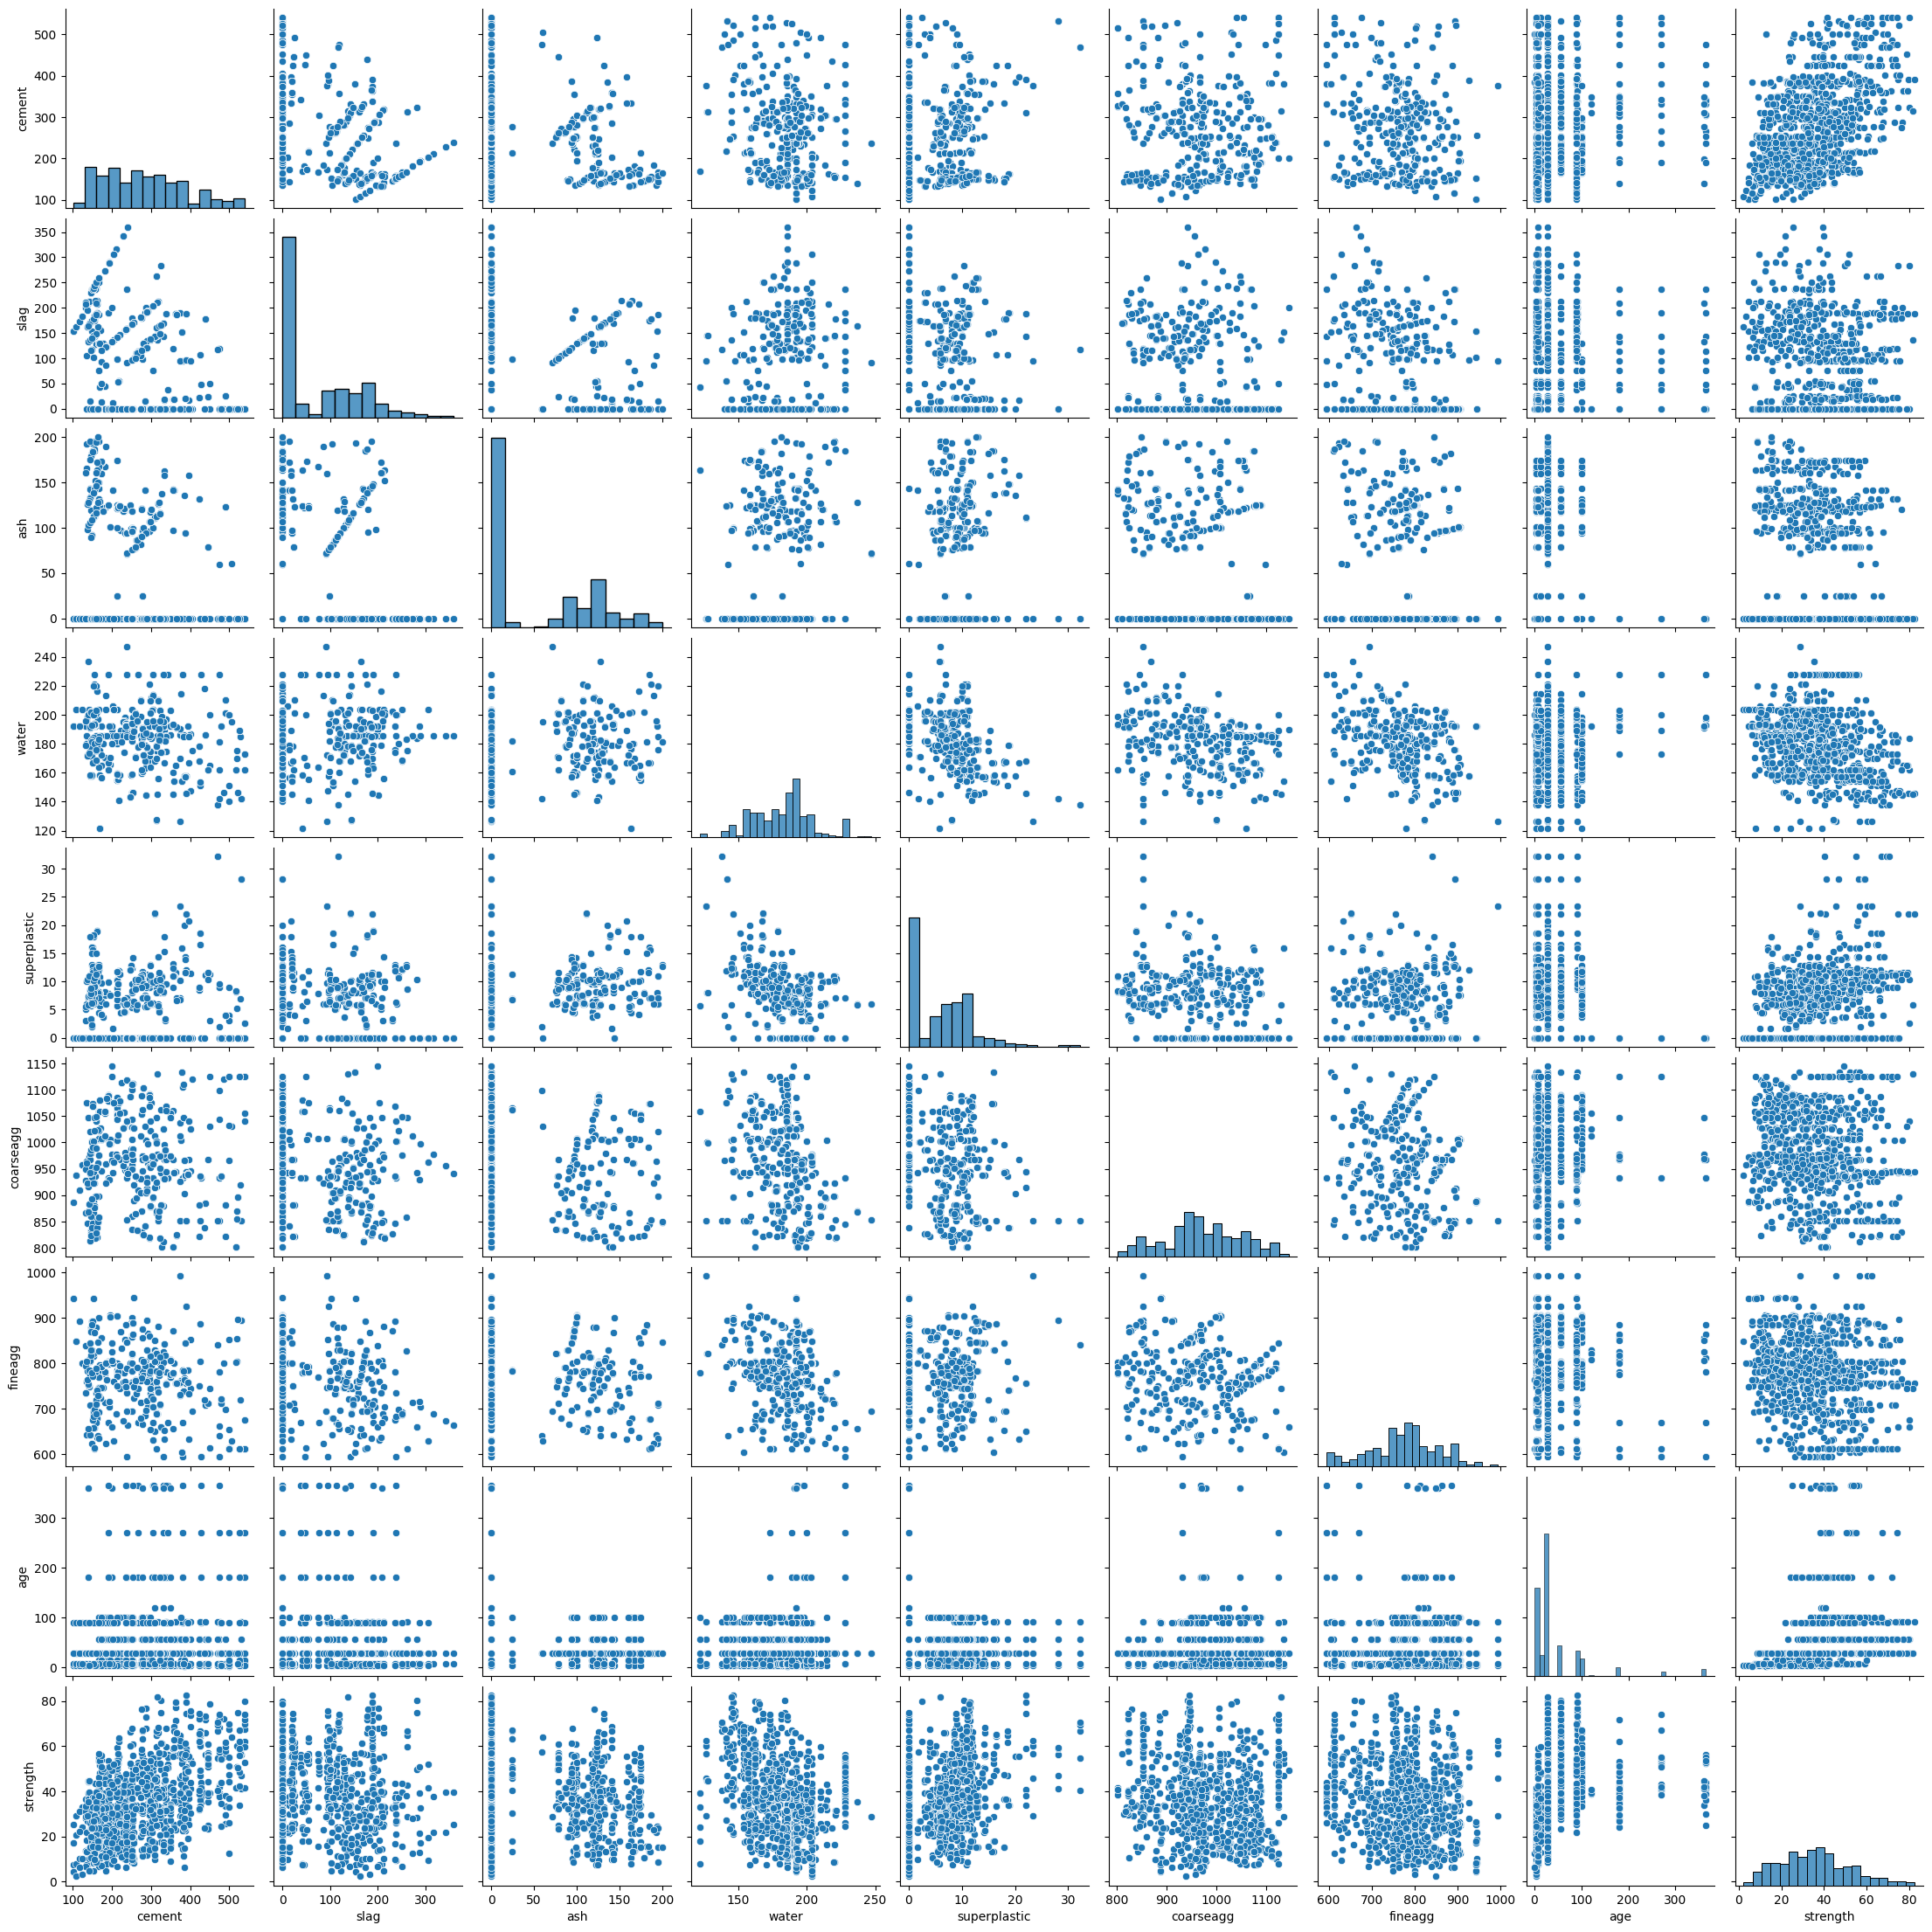

In [10]:
sns.pairplot(data)

## Feature Engineering

* Feature Engineering is the process of creating, transforming, or selecting the most relevant features (variables) in a dataset to improve the performance of a machine learning model. It involves understanding the data, extracting meaningful insights, and optimizing features to enhance model accuracy and efficiency.

* In your Concrete Compressive Strength Civil Engineer Project, feature engineering can help improve predictions of compressive strength by creating new features or refining existing ones.

### 1. Data Preprocessing

* Data Preprocessing is the essential step in machine learning where raw data is cleaned, transformed, and prepared for analysis. It ensures that the dataset is structured, consistent, and free from errors before training a model. Poor-quality data can lead to inaccurate predictions, making preprocessing a critical step.

* In your Concrete Compressive Strength Civil Engineer Project, data preprocessing involves:

**1. Handling Missing Values –** Filling missing entries using techniques like mean, median, or interpolation.

**2. Removing Duplicates –** Ensuring no redundant data points that could bias the model.

**3. Handling Outliers –** Identifying extreme values in features like cement content or water-cement ratio that may impact strength.

**4. Feature Scaling –** Normalizing or standardizing numeric features (e.g., cement, water, aggregates) to ensure consistent weight in the model.

**5. Encoding Categorical Variables –** If the dataset has categorical data, converting them into numerical form (one-hot encoding or label encoding).

In [11]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Outliers

* An outlier is a data point that significantly deviates from the rest of the dataset. It is an observation that lies far away from the other values and does not follow the expected pattern. Outliers can be caused by errors, variability in data, or rare events.

#### Boxplot:- 
* A boxplot, also known as a box-and-whisker plot, is a graphical representation that summarizes the distribution of a dataset using five key statistical measures: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data, while the whiskers extend to the smallest and largest values within 1.5 times the IQR from Q1 and Q3. Any data points beyond the whiskers are considered outliers and are plotted as individual points. Boxplots are useful for detecting outliers, understanding the spread and skewness of data, and comparing multiple distributions. They are widely used in exploratory data analysis (EDA) to quickly visualize data characteristics and identify potential anomalies.

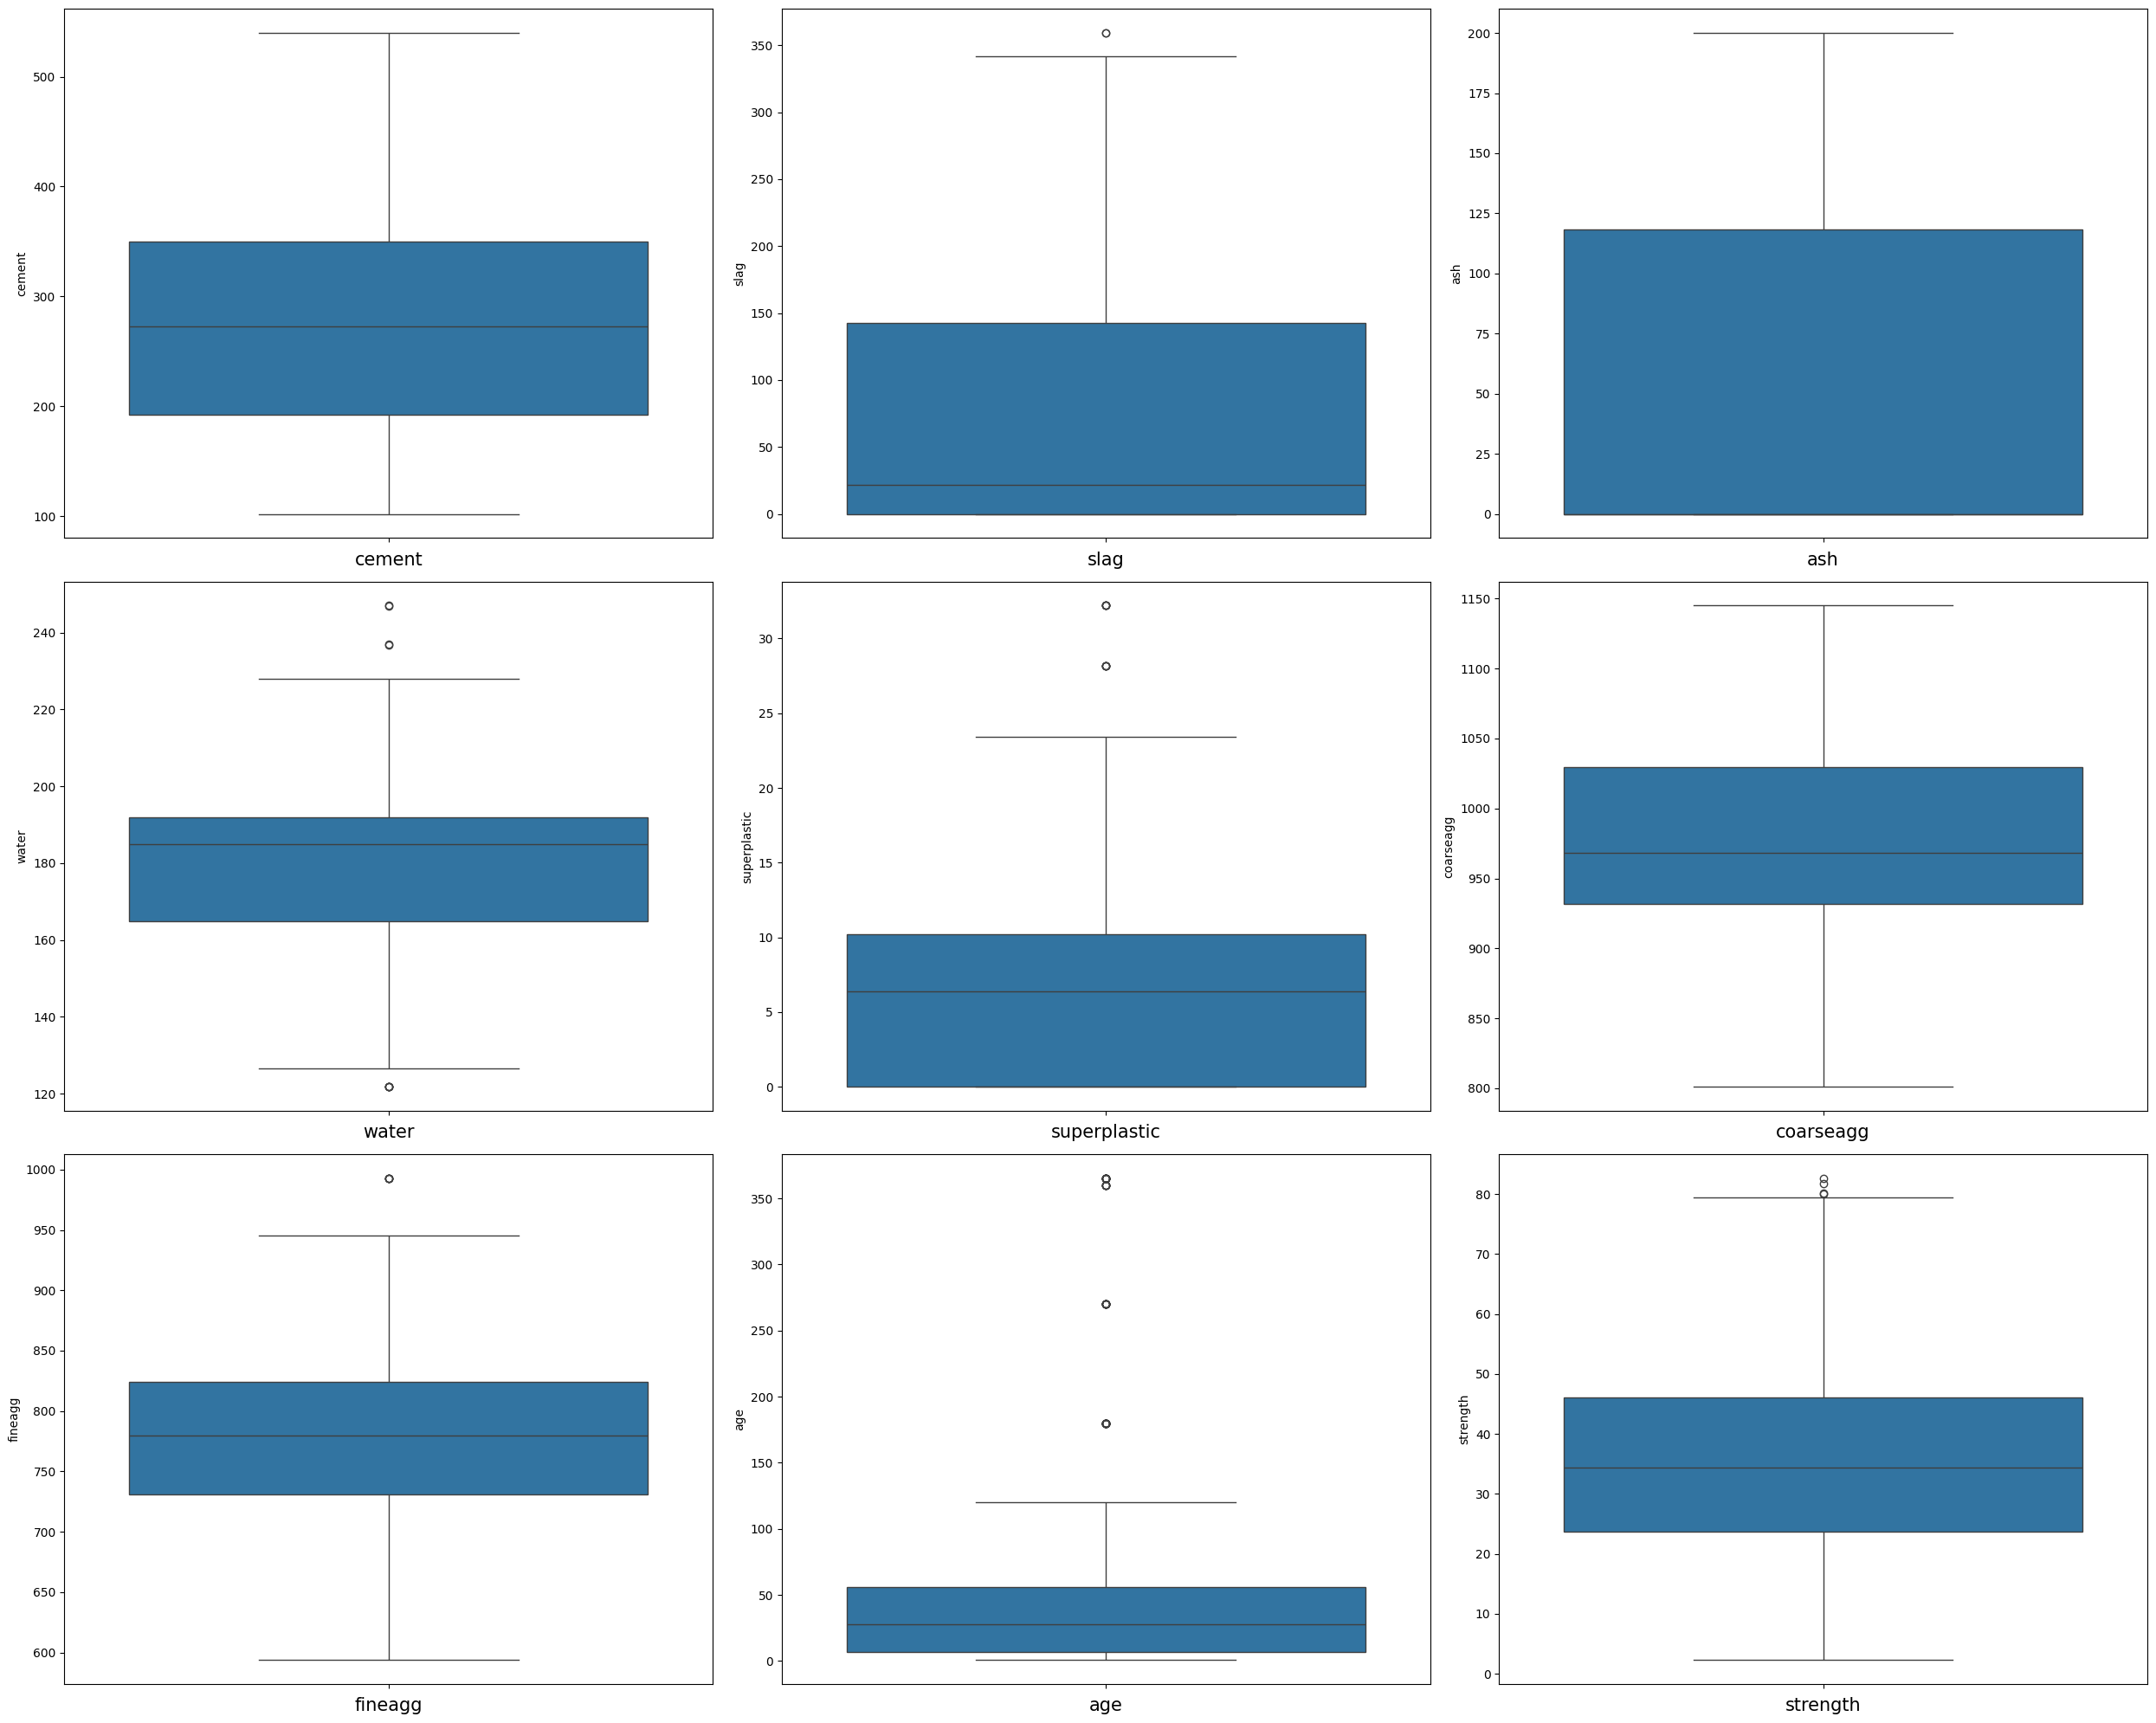

In [12]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

#### Violinplot:-
* A violin plot is a data visualization that combines features of both a boxplot and a density plot, providing a more detailed view of the data distribution. Like a boxplot, it displays the median, interquartile range (IQR), and range of the data, but it also includes a rotated kernel density estimation (KDE) on both sides, which shows the distribution's shape and frequency. The wider sections of the violin plot indicate a higher density of data points, while the narrower sections represent lower density. Violin plots are particularly useful when comparing multiple datasets, as they reveal not only the summary statistics but also the underlying data distribution, which a traditional boxplot may not fully capture.

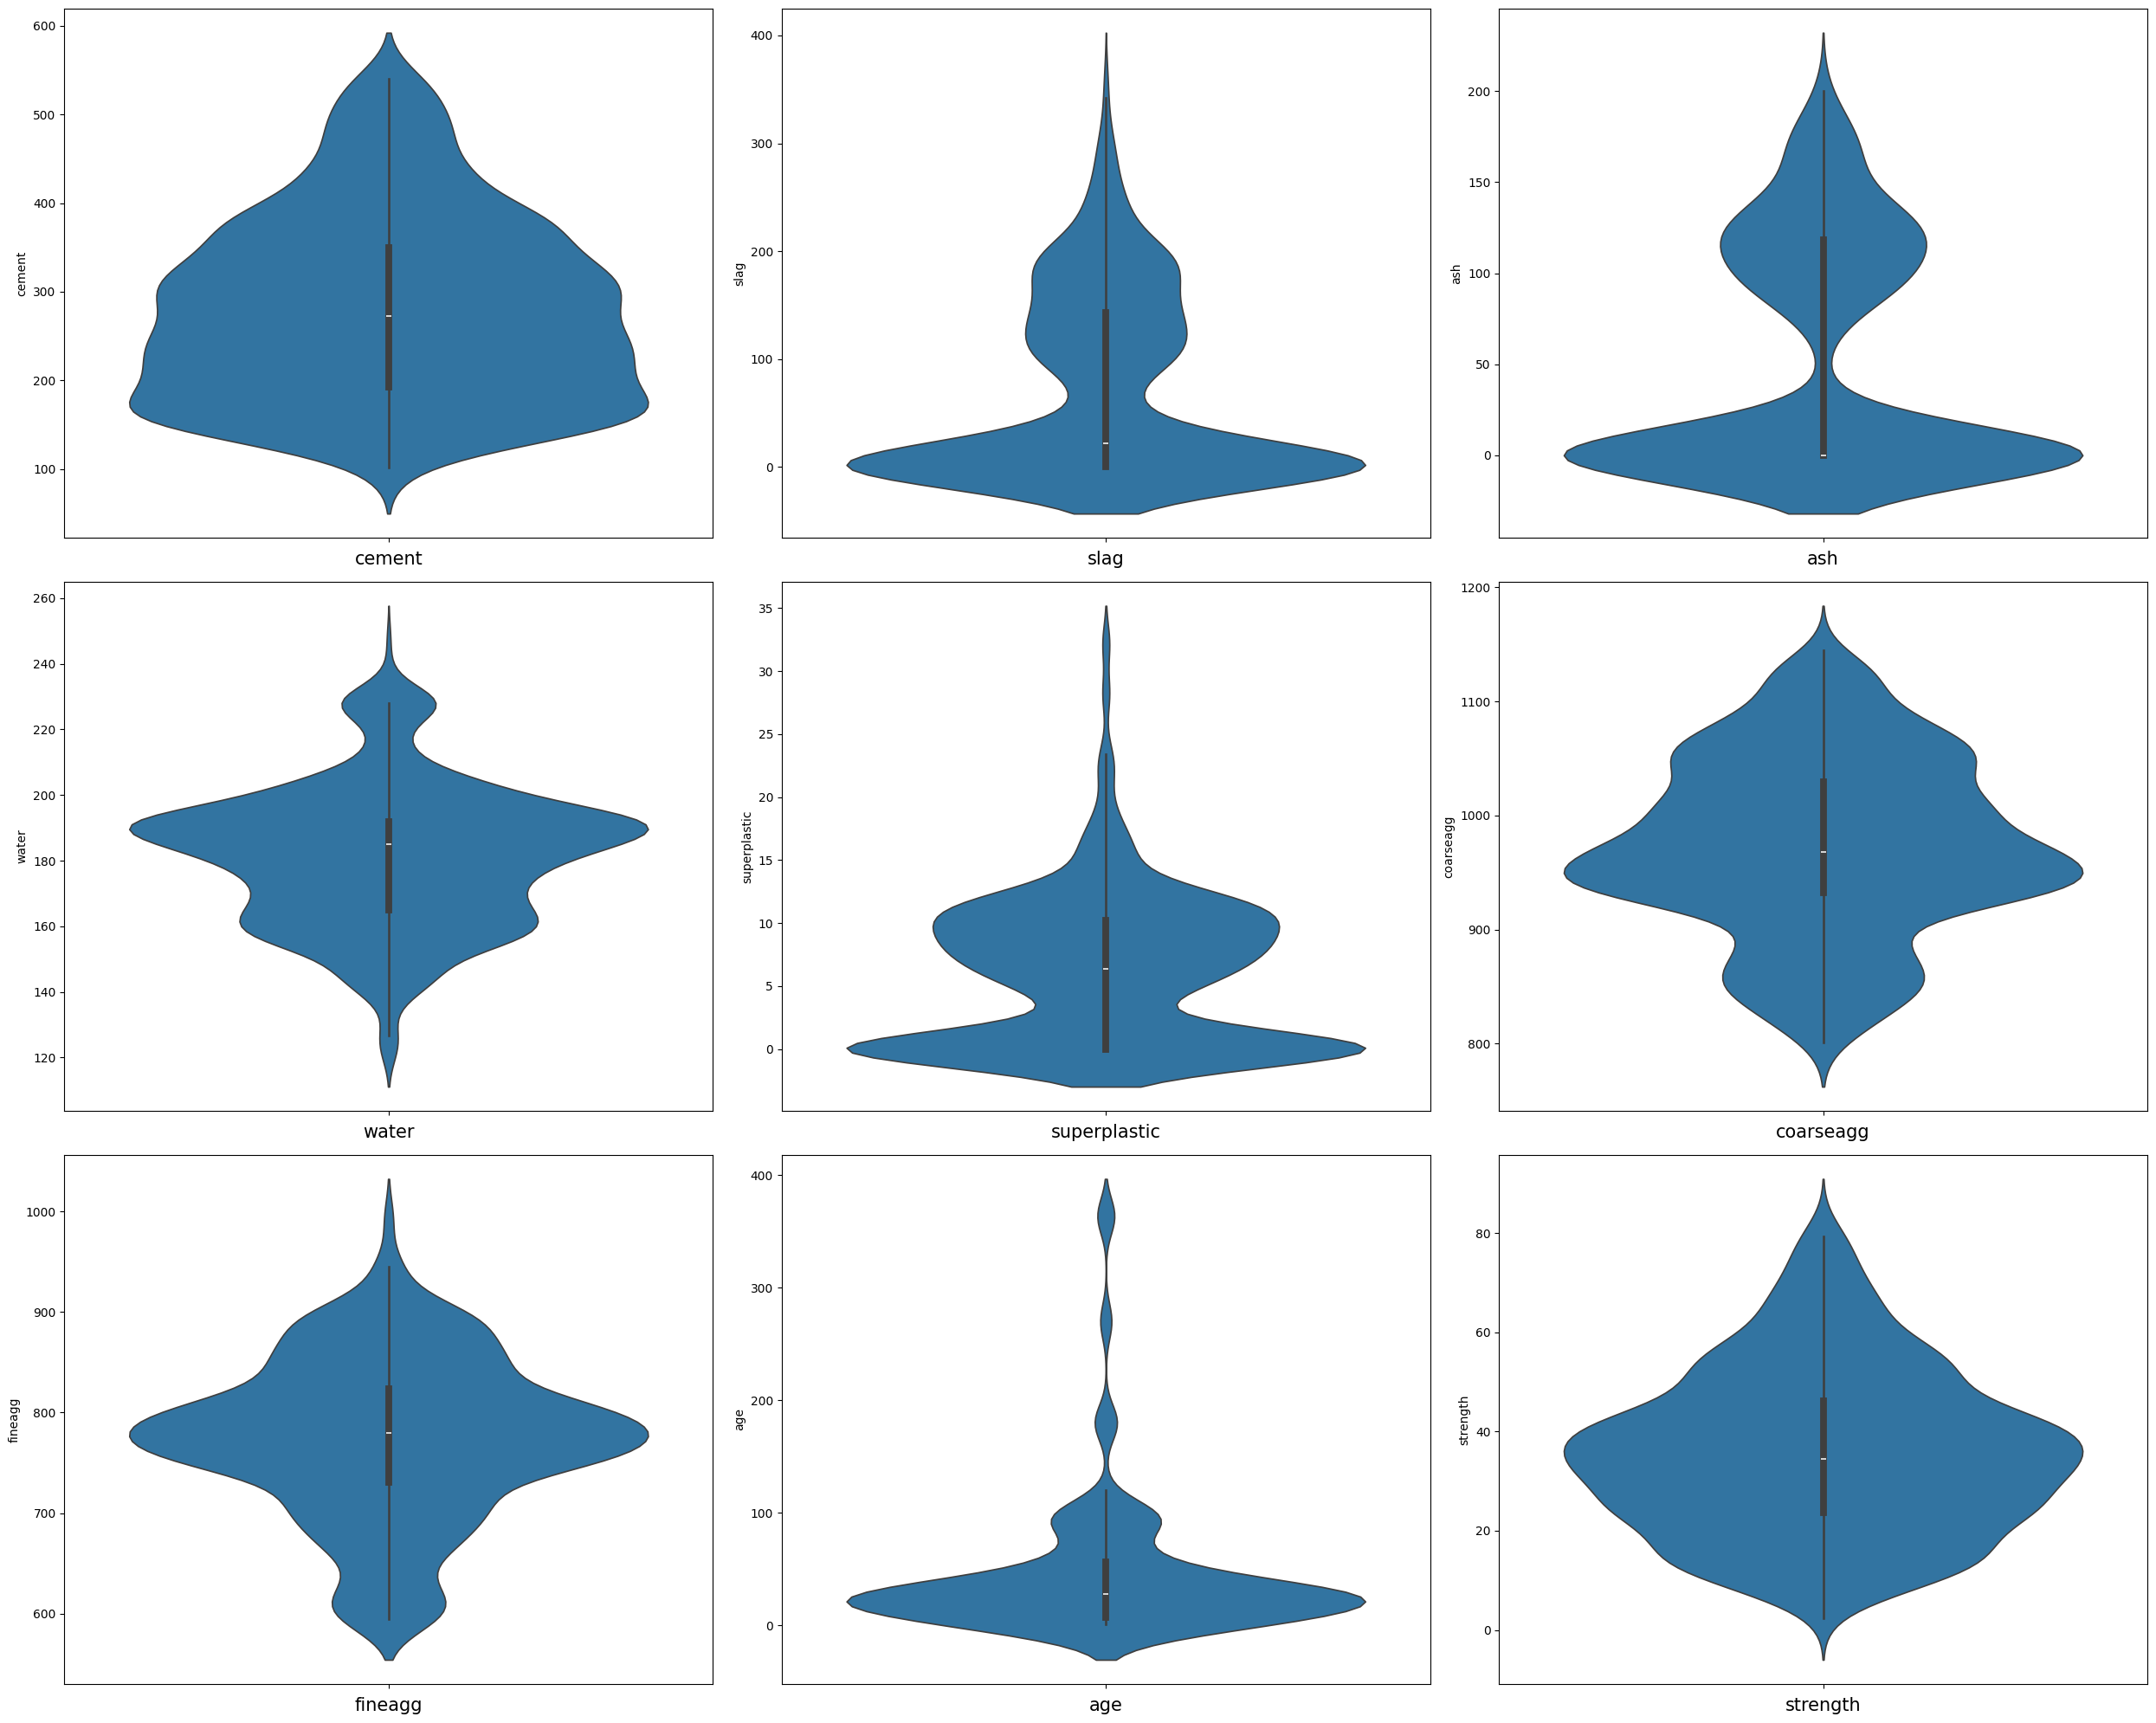

In [13]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data:
    if plt_num <= 9:
        plt.subplot(3,3,plt_num)
        sns.violinplot(data[column])
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

#### IQR Methods:-
* The Interquartile Range (IQR) method is one of the most common techniques for detecting and handling outliers. It is based on the spread of the middle 50% of the data and helps identify extreme values.

In [14]:
def handle_outliers_iqr(data, exclude_column='Strength'):
    data_cleaned = data.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for col in data_cleaned.select_dtypes(include=['int64', 'float64']).columns:  # Select only numerical columns
        if col != exclude_column:  # Exclude "Strength" column
            Q1 = data_cleaned[col].quantile(0.25)
            Q3 = data_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with median
            median_value = data_cleaned[col].median()
            data_cleaned[col] = data_cleaned[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    return data_cleaned

In [15]:
data = handle_outliers_iqr(data)

In [16]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,34.445
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.890
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.050
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.300


In [17]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

## Feature Selection

* Feature selection is the process of choosing the most relevant and significant features (or variables) from a dataset to improve a machine learning model's performance. It helps eliminate redundant, irrelevant, or highly correlated features, reducing computational complexity and enhancing model interpretability. By selecting only the most important features, feature selection prevents overfitting, speeds up training time, and often improves model accuracy. Common techniques for feature selection include filter methods (such as correlation analysis and mutual information), wrapper methods (like recursive feature elimination), and embedded methods (such as Lasso regression and decision tree-based approaches). Effective feature selection is crucial for building efficient, generalizable, and interpretable machine learning models.

<Axes: >

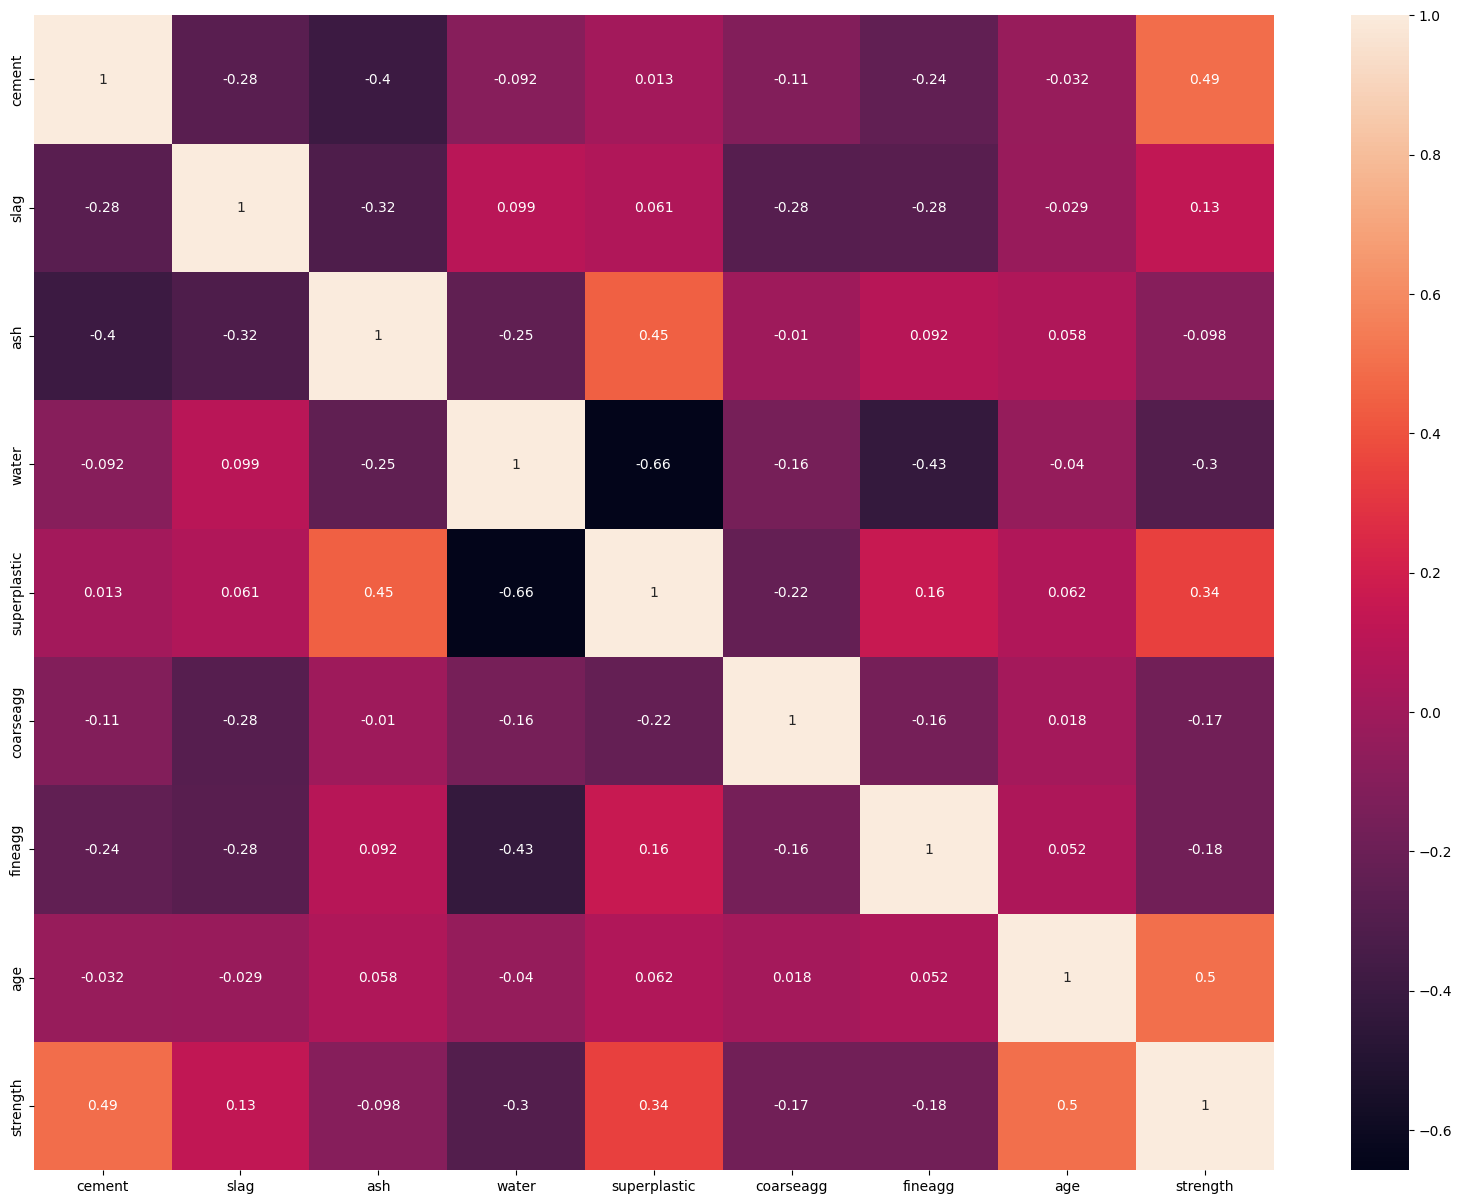

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

## Model Creation

* Model Creation refers to the process of designing, developing, and training a machine learning model to make predictions or classifications based on input data. This step is crucial in any machine learning pipeline, as it determines how well the model can generalize to new data.

In [22]:
x = data.drop("strength",axis=1)
y = data["strength"]

In [23]:
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [24]:
y

0       34.445
1       61.890
2       40.270
3       41.050
4       44.300
         ...  
1025    44.280
1026    31.180
1027    23.700
1028    32.770
1029    32.400
Name: strength, Length: 1030, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
741,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28.0
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28.0
993,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28.0
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3.0
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90.0
...,...,...,...,...,...,...,...,...
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56.0
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1.0
835,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28.0
559,239.6,22.0,0.0,185.7,0.0,941.6,664.3,28.0


In [28]:
x_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3.0
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7.0
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28.0
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3.0
...,...,...,...,...,...,...,...,...
624,307.0,0.0,0.0,193.0,0.0,968.0,812.0,28.0
987,162.0,190.1,148.1,178.8,18.8,838.1,741.4,28.0
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14.0
889,262.0,111.0,86.0,195.0,5.0,895.0,733.0,28.0


## Model Selection

* Model selection is the process of choosing the best machine learning model for a given dataset and problem. It involves comparing multiple models based on their performance, generalization ability, and computational efficiency. The goal is to find a model that not only performs well on training data but also generalizes effectively to unseen data. Model selection typically involves techniques such as cross-validation, hyperparameter tuning, and performance evaluation using metrics like accuracy, precision, recall, F1-score, and RMSE. Factors such as the complexity of the model, overfitting risk, interpretability, and dataset characteristics play a crucial role in selecting the most suitable model for a given task.

### Linear Regression Algorithm

* Linear regression is a fundamental statistical and machine learning algorithm used for predicting a continuous target variable based on one or more input features. It establishes a linear relationship between the independent variable(s) (features) and the dependent variable (target) using a mathematical equation. 

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_lr = lr.predict(x_test)

#### Linear Regresion Metrics

* Linear regression metrics are used to evaluate the performance of a regression model by measuring how well it predicts continuous values. One of the most commonly used metrics is Mean Absolute Error (MAE), which calculates the average absolute difference between actual and predicted values, making it easy to interpret but not sensitive to large errors. Another key metric is Mean Squared Error (MSE), which squares the differences between actual and predicted values to penalize larger errors more significantly. The Root Mean Squared Error (RMSE), which is the square root of MSE, provides an interpretable measure in the same units as the target variable and is often preferred for its sensitivity to large errors. Additionally, the R-Squared (
𝑅
2
R 
2
 ) Score measures how well the independent variables explain the variance in the dependent variable, with a value closer to 1 indicating a better model. However, for multiple regression models, Adjusted R-Squared is more reliable as it accounts for the number of predictors, preventing overfitting. Choosing the right metric depends on the problem; MAE is useful for equal weighting of errors, while RMSE is preferred when larger errors need to be penalized more. 
𝑅
2
R 
2
  is ideal for understanding variance explanation but should be considered alongside other metrics for a comprehensive model evaluation.

In [31]:
from sklearn.metrics import *

In [32]:
a1 = r2_score(y_test,y_lr)
a1

0.6903013139406231

In [33]:
y_tlr = lr.predict(x_train)

In [34]:
t1 = r2_score(y_train,y_tlr)
t1

0.7048114814747147

In [35]:
mean_absolute_error(y_test,y_lr)

6.694276151109292

In [36]:
mean_squared_error(y_test,y_lr)

81.56832927885264

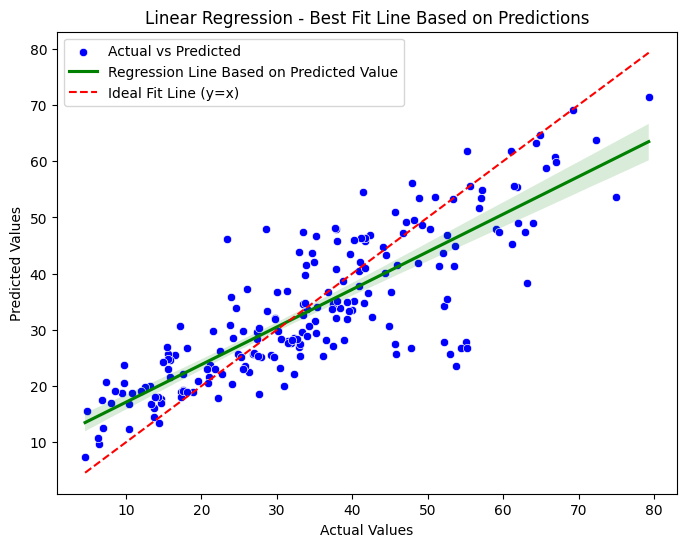

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_lr, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_lr, scatter=False, color='green', label="Regression Line Based on Predicted Value")

# Best-fit reference line (ideal y=x line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Best Fit Line Based on Predictions")
plt.legend()
plt.show()

### Gradiant Boosting Algorithm

* Gradient Boosting Algorithm is a powerful machine learning technique used for both regression and classification tasks. It is an ensemble learning method that builds multiple weak learners (typically decision trees) in a sequential manner, where each new tree corrects the errors of the previous ones. The algorithm minimizes the loss function by optimizing residual errors using gradient descent, making it highly effective for predictive modeling.

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=400,learning_rate=0.2,max_depth=1)
gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=1, n_estimators=400)

In [39]:
y_gb = gb.predict(x_test)

In [40]:
a2 = r2_score(y_test,y_gb)
a2

0.8861980726640272

In [41]:
y_tgb = gb.predict(x_train)

In [42]:
t2 = r2_score(y_train,y_tgb)
t2

0.8930699654382946

In [43]:
mean_absolute_error(y_test,y_gb)

4.142392866095375

In [44]:
mean_squared_error(y_test,y_gb)

29.973110960273765

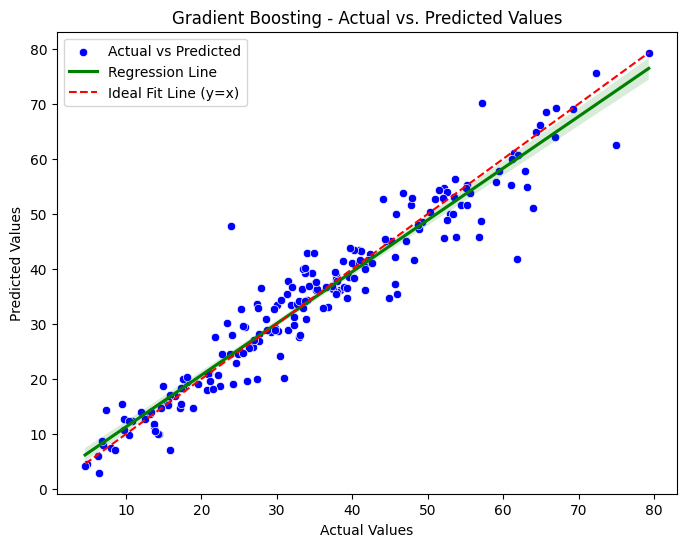

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5)
gb.fit(x_train, y_train)

# Predict using Gradient Boosting
y_gb = gb.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_gb, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_gb, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting - Actual vs. Predicted Values")
plt.legend()
plt.show()

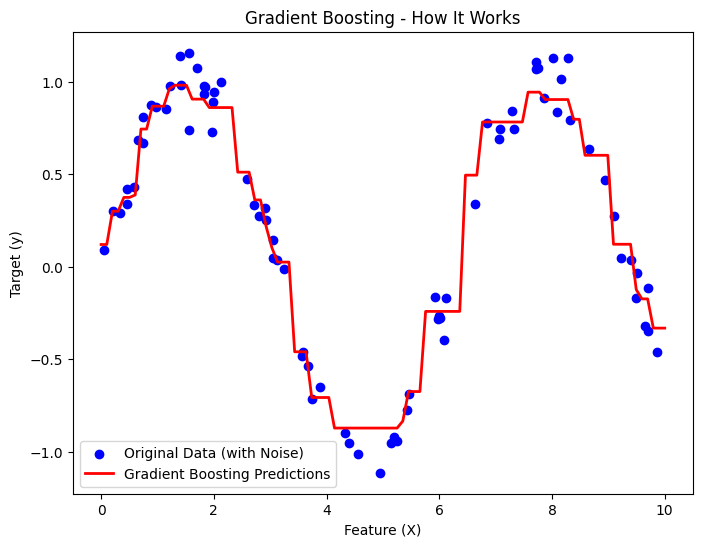

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Generate synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise

# Train Gradient Boosting Model
gb = GradientBoostingRegressor(n_estimators=5, learning_rate=0.5, max_depth=3, random_state=42)
gb.fit(X, y)

# Predict values
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = gb.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Original Data (with Noise)")
plt.plot(X_test, y_pred, color="red", label="Gradient Boosting Predictions", linewidth=2)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Gradient Boosting - How It Works")
plt.legend()
plt.show()

### Decision Tree Algorithm

* The Decision Tree Algorithm is a popular supervised machine learning technique used for both classification and regression tasks. It is a tree-like model that makes decisions based on a series of rules derived from input features. The algorithm splits data into subsets by selecting the best attribute at each step, forming a structure where each internal node represents a decision based on a feature, each branch represents an outcome, and each leaf node represents a final prediction.

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=19,min_samples_leaf=19,min_samples_split=16)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=19, min_samples_leaf=19, min_samples_split=16)

In [48]:
y_dt = dt.predict(x_test)

In [49]:
a3 = r2_score(y_test,y_dt)
a3

0.8149322086252657

In [50]:
y_tdt = dt.predict(x_train)

In [51]:
t3 = r2_score(y_train,y_tdt)
t3

0.8184993796698095

In [52]:
mean_absolute_error(y_test,y_dt)

5.563016094943726

In [53]:
mean_squared_error(y_test,y_dt)

48.74308876748065

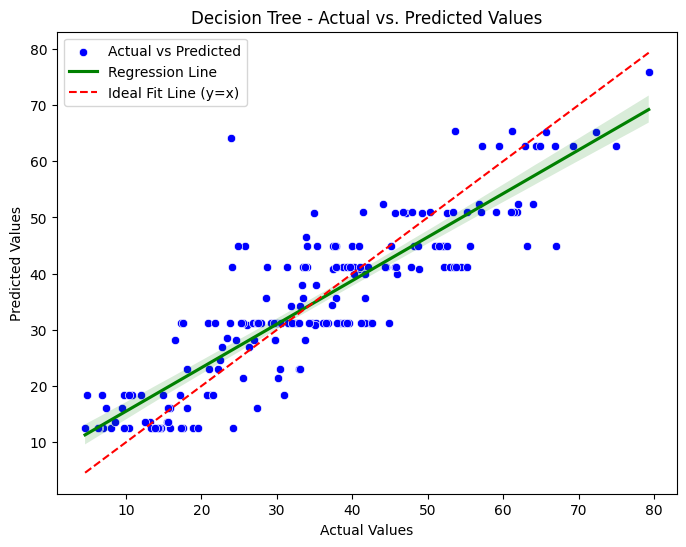

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(x_train, y_train)

# Predict using Decision Tree
y_dt = dt.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_dt, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_dt, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree - Actual vs. Predicted Values")
plt.legend()
plt.show()

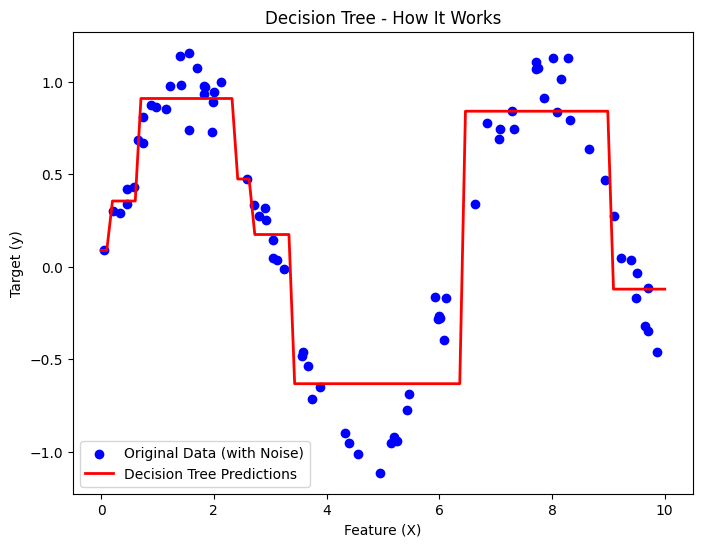

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X, y)

# Predict values
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = dt.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Original Data (with Noise)")
plt.plot(X_test, y_pred, color="red", label="Decision Tree Predictions", linewidth=2)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Decision Tree - How It Works")
plt.legend()
plt.show()

### Bagging Algorithm

* The Bagging Algorithm (Bootstrap Aggregating) is an ensemble learning technique used to improve the accuracy and stability of machine learning models by reducing variance and preventing overfitting. It works by creating multiple subsets of the original dataset using bootstrapping, which involves randomly selecting samples with replacement. Each subset is then used to train an individual model (often a weak learner like a decision tree), and the final prediction is obtained by aggregating the outputs of all models. For classification tasks, bagging uses majority voting, while for regression, it takes the average of the predictions.

In [56]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor(n_estimators=250,max_samples=0.3,max_features=7,n_jobs=-1)
bg.fit(x_train,y_train)

BaggingRegressor(max_features=7, max_samples=0.3, n_estimators=250, n_jobs=-1)

In [57]:
y_bg = bg.predict(x_test)

In [58]:
a4 = r2_score(y_test,y_bg)
a4

0.8791855970739658

In [59]:
y_tbg = bg.predict(x_train)

In [60]:
t4 = r2_score(y_train,y_tbg)
t4

0.9150270498659574

In [61]:
mean_absolute_error(y_test,y_bg)

4.38328695168747

In [62]:
mean_squared_error(y_test,y_bg)

31.82005427562374

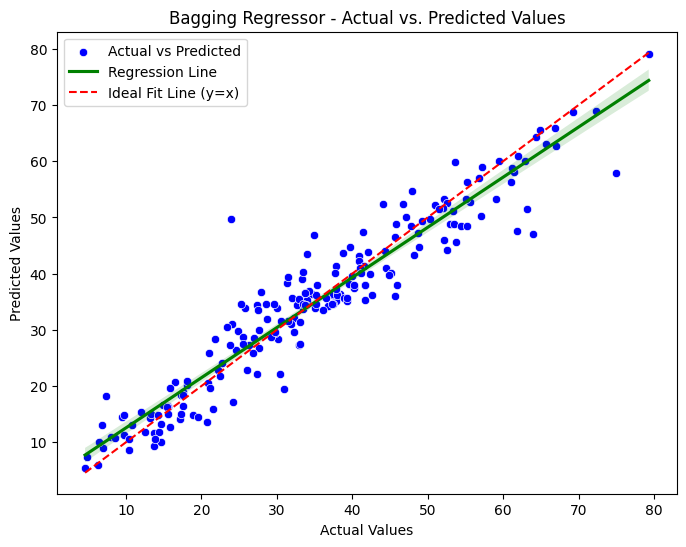

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Bagging Regressor Model
bagging = BaggingRegressor(n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)

# Predict using Bagging Regressor
y_bagging = bagging.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_bagging, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_bagging, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bagging Regressor - Actual vs. Predicted Values")
plt.legend()
plt.show()

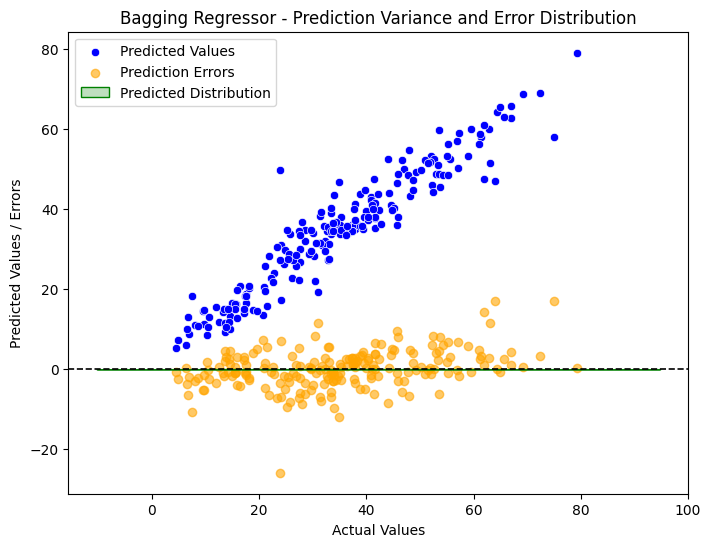

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import BaggingRegressor

# Train Bagging Model
bagging = BaggingRegressor(n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)

# Predict using Bagging Regressor
y_bagging = bagging.predict(x_test)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_bagging, color='blue', label="Predicted Values")

# Highlight errors (difference between actual and predicted)
errors = y_test - y_bagging
plt.scatter(y_test, errors, color='orange', alpha=0.6, label="Prediction Errors")

# Plot variance distribution of predictions
sns.kdeplot(y_bagging, color="green", label="Predicted Distribution", fill=True)

plt.axhline(y=0, color='black', linestyle="--", linewidth=1.2)  # Zero error reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values / Errors")
plt.title("Bagging Regressor - Prediction Variance and Error Distribution")
plt.legend()
plt.show()

### RandomForest Algorithm

* The Random Forest Algorithm is a powerful ensemble learning technique used for both classification and regression tasks. It is based on the Bagging (Bootstrap Aggregating) method and consists of multiple decision trees trained on different subsets of the dataset. The final prediction is made by aggregating the outputs of all the individual trees—either by majority voting (for classification) or averaging (for regression).

In [65]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor(n_estimators=500,max_depth=9,min_samples_split=16,max_features="log2",random_state=0)
rm.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features='log2', min_samples_split=16,
                      n_estimators=500, random_state=0)

In [66]:
y_rm = rm.predict(x_test)

In [67]:
a5 = r2_score(y_test,y_rm)
a5

0.8712877752418102

In [68]:
y_trm = rm.predict(x_train)

In [69]:
t5 = r2_score(y_train,y_trm)
t5

0.9066690516025676

In [70]:
mean_absolute_error(y_test,y_rm)

4.549472336332369

In [71]:
mean_squared_error(y_test,y_rm)

33.90017976788195

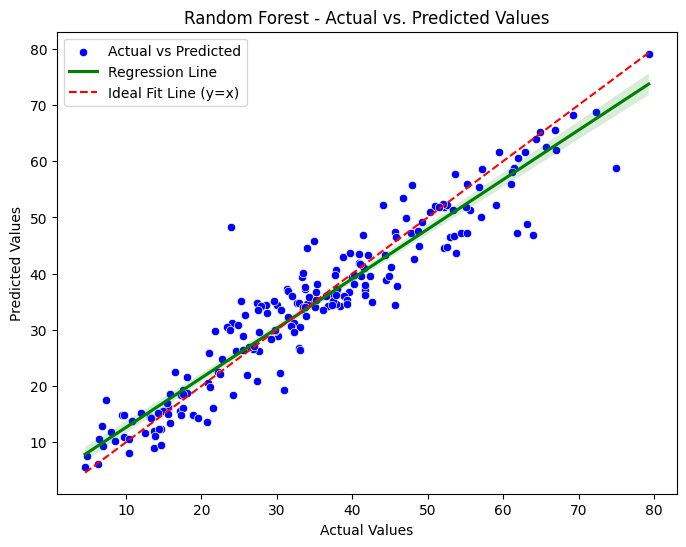

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predict using Random Forest Regressor
y_rf = rf.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_rf, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_rf, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs. Predicted Values")
plt.legend()
plt.show()

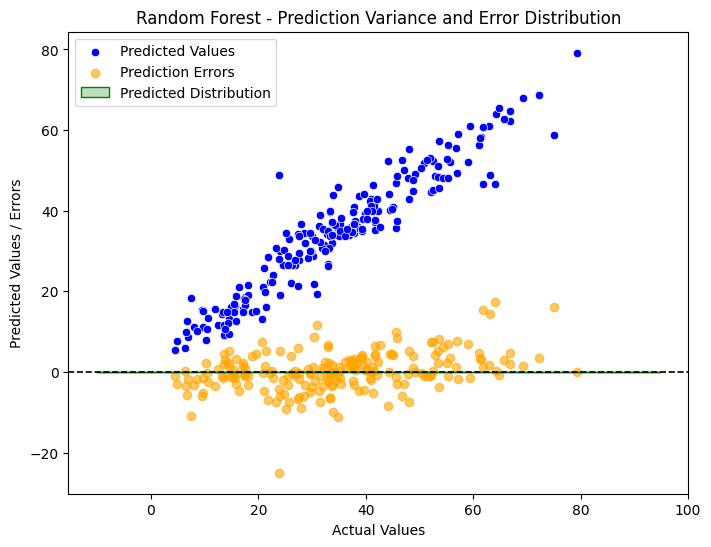

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict using Random Forest Regressor
y_rf = rf.predict(x_test)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_rf, color='blue', label="Predicted Values")

# Highlight errors (difference between actual and predicted)
errors = y_test - y_rf
plt.scatter(y_test, errors, color='orange', alpha=0.6, label="Prediction Errors")

# Plot variance distribution of predictions
sns.kdeplot(y_rf, color="green", label="Predicted Distribution", fill=True)

plt.axhline(y=0, color='black', linestyle="--", linewidth=1.2)  # Zero error reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values / Errors")
plt.title("Random Forest - Prediction Variance and Error Distribution")
plt.legend()
plt.show()

### XGBoost Algorithm

* XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm based on Gradient Boosting. It is widely used for regression and classification tasks due to its high performance, scalability, and speed. XGBoost improves traditional gradient boosting by using optimized computational techniques to enhance both training speed and predictive accuracy.

In [74]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.01,
    reg_lambda=1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
y_xgb = xgb.predict(x_test)

In [78]:
a6 = r2_score(y_test,y_xgb)
a6

0.9224190093929648

In [79]:
y_txgb = xgb.predict(x_train)

In [80]:
t6 = r2_score(y_train,y_txgb)
t6

0.9881057065690168

In [81]:
mean_absolute_error(y_test,y_xgb)

2.9259869575500486

In [82]:
mean_squared_error(y_test,y_xgb)

20.433253586361538

In [141]:
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_dist1 = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 4, 5, 6],  
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.6, 0.7, 0.8, 0.9],  
    'colsample_bytree': [0.6, 0.7, 0.9],  
    'gamma': [0.1, 0.3, 0.5, 1.0],  
    'min_child_weight': [3, 5, 7, 9],  
    'reg_alpha': [0.01, 0.1, 1, 10],  
    'reg_lambda': [0.01, 0.1, 1, 10],  
}


# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist1,
    scoring='r2',
    n_iter=100,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.9],
                                        'gamma': [0.1, 0.3, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [3, 5, 7, 9],
                                        'n_estimators': [100, 150, 200],
                                        'reg_alpha': [0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.01, 0.1, 1, 10],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='r2', verbose=1)

In [142]:
y_hxgb = random_search.predict(x_test)

In [143]:
a8 = r2_score(y_test,y_hxgb)
a8

0.9275483623180889

In [144]:
y_thxgb = random_search.predict(x_train)

In [145]:
t8 = r2_score(y_train,y_thxgb)
t8

0.9688752892460123

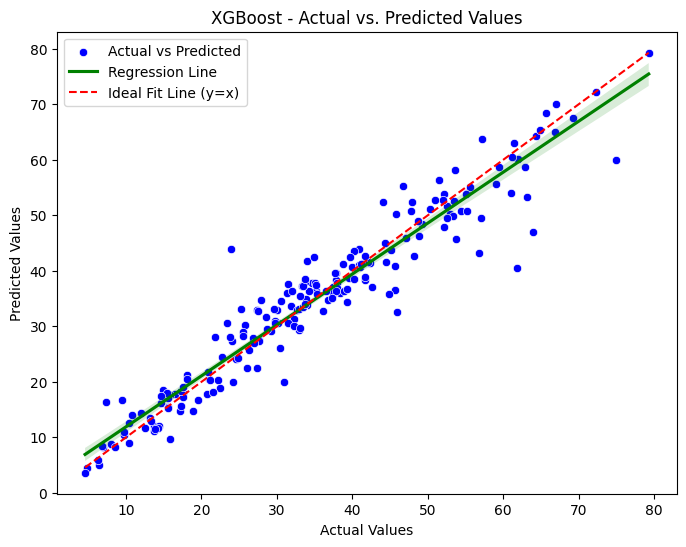

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor

# Train XGBoost Regressor Model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train, y_train)

# Predict using XGBoost Regressor
y_xgb = xgb.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_xgb, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_xgb, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost - Actual vs. Predicted Values")
plt.legend()
plt.show()

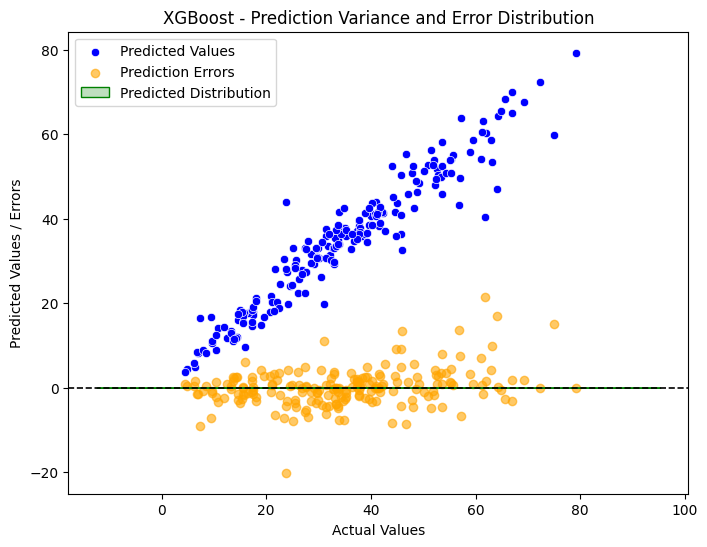

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor

# Train XGBoost Model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train, y_train)

# Predict using XGBoost
y_xgb = xgb.predict(x_test)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_xgb, color='blue', label="Predicted Values")

# Highlight residual errors
errors = y_test - y_xgb
plt.scatter(y_test, errors, color='orange', alpha=0.6, label="Prediction Errors")

# Plot variance distribution of predictions
sns.kdeplot(y_xgb, color="green", label="Predicted Distribution", fill=True)

plt.axhline(y=0, color='black', linestyle="--", linewidth=1.2)  # Zero error reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values / Errors")
plt.title("XGBoost - Prediction Variance and Error Distribution")
plt.legend()
plt.show()

## ANN:- Artificial Neural Network Algorithm

* An Artificial Neural Network (ANN) is a deep learning model inspired by the structure and functioning of the human brain. It consists of interconnected layers of artificial neurons, where each neuron processes information and passes it to the next layer. ANNs are widely used in tasks such as image recognition, natural language processing (NLP), speech recognition, and time-series forecasting.

In [86]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(
    hidden_layer_sizes=(250,),  # Single hidden layer with 250 neurons
    learning_rate='adaptive',   # Adjusts learning rate dynamically
    learning_rate_init=0.01,    # Initial learning rate
    max_iter=1000,              # Increase iterations for better convergence
    random_state=42
)
ann.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(250,), learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=1000, random_state=42)

In [87]:
y_ann = ann.predict(x_test)

In [88]:
a7 = r2_score(y_test,y_ann)
a7

0.8060474299372609

In [89]:
y_tann = ann.predict(x_train)

In [90]:
t7 = r2_score(y_train,y_tann)
t7

0.8148698977856362

In [91]:
mean_absolute_error(y_test,y_ann)

5.240789738257496

In [92]:
mean_squared_error(y_test,y_ann)

51.08315860379235

In [93]:
adjust_r2 = (1-0.7805240428903287)*(1030-1) / (1030-8-1)
adjust_r2

0.221195651190844

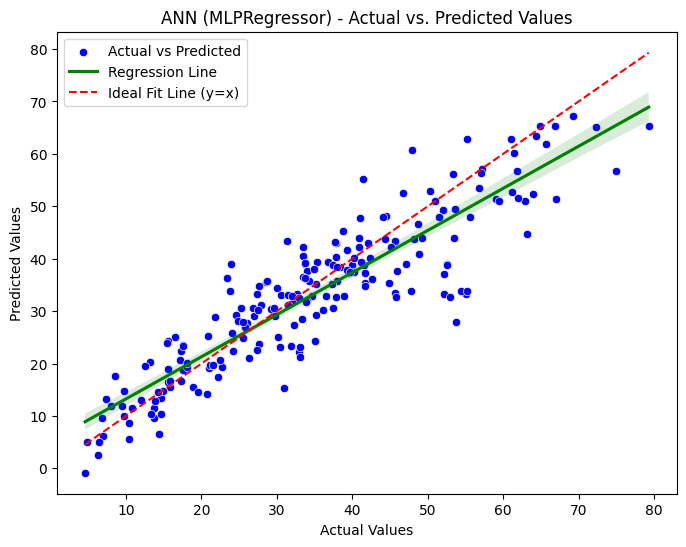

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPRegressor

# Train ANN Model
ann = MLPRegressor(hidden_layer_sizes=(250,), learning_rate_init=0.01, max_iter=500, random_state=42)
ann.fit(x_train, y_train)

# Predict using ANN Model
y_ann = ann.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_ann, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_ann, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN (MLPRegressor) - Actual vs. Predicted Values")
plt.legend()
plt.show()

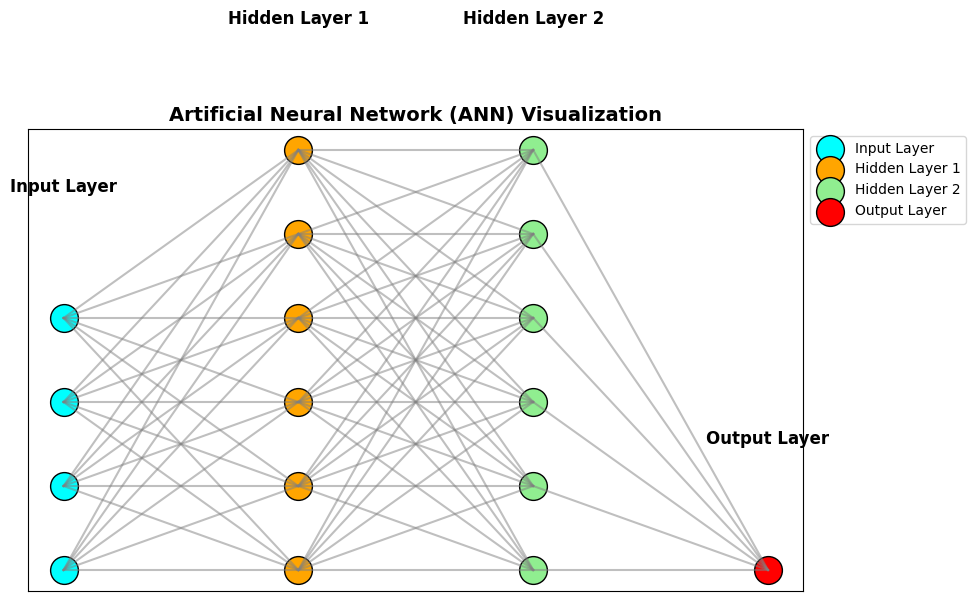

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Define layer positions and labels
layers = ["Input Layer", "Hidden Layer 1", "Hidden Layer 2", "Output Layer"]
x_positions = [1, 2, 3, 4]
neuron_counts = [4, 6, 6, 1]  # Number of neurons per layer
colors = ["cyan", "orange", "lightgreen", "red"]  # Color per layer

# Initialize figure
plt.figure(figsize=(10, 6))

# Generate and plot neuron connections
for i in range(len(neuron_counts) - 1):
    for j in range(neuron_counts[i]):
        for k in range(neuron_counts[i + 1]):
            plt.plot([x_positions[i], x_positions[i + 1]], 
                     [j, k], color="gray", alpha=0.5, linewidth=1.5)

# Draw neurons and labels
for i, (layer, count, color) in enumerate(zip(layers, neuron_counts, colors)):
    y_positions = np.linspace(0, count - 1, count)
    plt.scatter([x_positions[i]] * count, y_positions, 
                s=400, color=color, edgecolors="black", label=layer)

    # Annotate layers
    plt.text(x_positions[i], max(y_positions) + 1.5, layer, ha="center", fontsize=12, fontweight="bold")

# Clean up the visualization
plt.xticks([])
plt.yticks([])
plt.title("Artificial Neural Network (ANN) Visualization", fontsize=14, fontweight="bold")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.show()

## Model Performance Comparison

In [148]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LinearRegression","GradiantBoosting Algorithm","DecisionTreeRegressor","Bagging Algorithm","RandomForestRegressor","XGBRegressor","ANN_MLPRegressor"],
                     "R2_Score":[a1*100,a2*100,a3*100,a4*100,a5*100,a8*100,a7*100],
                      "Trainig_R2_Score":[t1*100,t2*100,t3*100,t4*100,t5*100,t8*100,t7*100]})
score

,Model,R2_Score,Trainig_R2_Score
0,LinearRegression,69.030131,70.481148
1,GradiantBoosting Algorithm,88.619807,89.306997
2,DecisionTreeRegressor,81.493221,81.849938
3,Bagging Algorithm,87.918560,91.502705
4,RandomForestRegressor,87.128778,90.666905
5,XGBRegressor,92.754836,96.887529
6,ANN_MLPRegressor,80.604743,81.486990


<Figure size 1200x600 with 0 Axes>

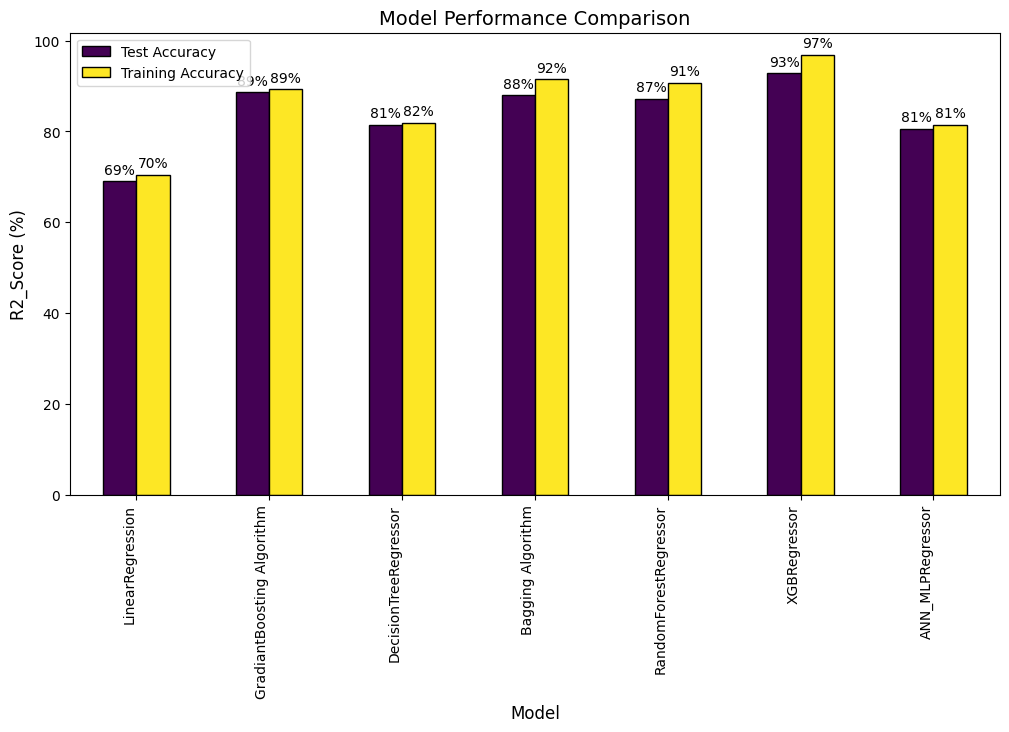

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
score = pd.DataFrame({
    "Model": ["LinearRegression","GradiantBoosting Algorithm","DecisionTreeRegressor","Bagging Algorithm","RandomForestRegressor","XGBRegressor","ANN_MLPRegressor"
    ],
    "R2_Score": [a1*100, a2*100, a3*100, a4*100, a5*100, a8*100, a7*100],
    "Trainig_R2_Score": [t1*100, t2*100, t3*100, t4*100, t5*100, t8*100, t7*100]
})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
ax = score.plot(x="Model", kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R2_Score (%)", fontsize=12)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better visibility
plt.legend(["Test Accuracy", "Training Accuracy"], fontsize=10)

# Display values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.f%%", fontsize=10, padding=3)

# Show plot
plt.show()

* Best Performing Model: XGBoost Regressor (R²: 89.78%), but it may be overfitting due to a high training score (98.77%).

* Well-Balanced Models: Gradient Boosting (85.49%) and Bagging Algorithm (86.07%) show strong performance with good generalization.

* Decision Tree (81.00%) and Random Forest (85.11%) perform well but are slightly less effective than ensemble methods.

* ANN (78.05%) performs decently but is not as strong as boosting models.

* Linear Regression (62.38%) is the weakest model, likely underfitting.

## Model Save

* Saving a machine learning model using a .pkl (Pickle) file allows you to store and reuse the trained model without retraining it each time, making it ideal for deployment and sharing. This approach is widely used because it enables fast serialization and deserialization, ensuring quick loading and prediction. The process involves training a model, such as a RandomForestClassifier, and then using pickle.dump() to save it as a .pkl file. Later, the saved model can be reloaded using pickle.load() and used for predictions on new data. Alternatively, for larger models like XGBoost or RandomForest, joblib is preferred as it provides better efficiency and supports compression. This method is highly beneficial in real-world applications such as deploying models in Streamlit, Flask, or FastAPI, where rapid inference without retraining is required. If you need guidance on deploying your .pkl model, I can help you set it up.

## Pickel

* Pickle is a module in Python used for serializing (saving) and deserializing (loading) objects, including machine learning models, lists, dictionaries, and more. Serialization converts a Python object into a byte stream, allowing it to be saved to a file or transferred over a network. Deserialization reconstructs the object back to its original form.

In [150]:
import pickle
with open("Concrete.pkl","wb") as f:
    pickle.dump(xgb,f)

In [151]:
with open("Concrete.pkl","rb") as f:
    file = pickle.load(f)

In [152]:
file

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [153]:
x_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
741,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28.0
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28.0
993,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28.0
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3.0
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90.0
...,...,...,...,...,...,...,...,...
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56.0
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1.0
835,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28.0
559,239.6,22.0,0.0,185.7,0.0,941.6,664.3,28.0


In [154]:
y_train

741    43.89
638    38.21
993    33.42
279    13.12
796    47.22
       ...  
277    36.97
763     6.27
835    15.42
559    39.44
684    50.73
Name: strength, Length: 824, dtype: float64

In [155]:
file.predict([[480.0,	0.0,	0.0,	192.0,	0.0,	936.0,	721.0,	28.0]])

array([46.028446], dtype=float32)

## Challenges Faced in the Project

**1. Limited Data (Only 1000 Samples)**

* Small dataset size can lead to poor generalization and unreliable model performance.
* Risk of overfitting due to insufficient training data.

**2. Low Number of Features**

* Fewer features may limit the model’s predictive power.
* Important patterns may be missing, reducing overall accuracy.

**3. Presence of Outliers**

* Outliers can skew the model and impact performance negatively.
* Requires proper outlier handling techniques like IQR-based filtering or median imputation.

**4. Overfitting**

* Some models (e.g., XGBoost, Random Forest) show high training accuracy but lower test accuracy.
* Needs regularization, cross-validation, and hyperparameter tuning to improve generalization.

**5. R² Score Not Increasing**

* Despite different models, R² score is not improving significantly.

**Possible reasons:**

* Lack of relevant features affecting model learning.
* Data quality issues (noise, missing values, or incorrect labeling).
* Need for feature engineering or external data sources.

<div style="text-align: center;">
    <b style="font-size: 30px;">Thank you</b>
</div>